# Интернет-магазин «В один клик»

ЦЕЛИ И ЗАДАЧИ:
- Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.
- Разработать модель, которая предскажет вероятность снижения покупательской активности.
- Выделить сегмент покупателей, проанализируйте его и предложите, как увеличить его покупательскую активность.

ХОД РАБОТЫ:
1) Загрузка данных

2) Предобработка данных

3) Исследовательский анализ данных

4) Объединение таблиц

5) Корреляционный анализ

6) Использование пайплайнов

7) Анализ важности признаков

8) Сегментация покупателей

9) Общий вывод


ОПИСАНИЕ ДАННЫХ:
1) Файл market_file.csv содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

Описание данных:

- id — номер покупателя в корпоративной базе данных.
- Покупательская активность —  рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса (Энергетическая кормовая единица) —  уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит —  показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

2) Файл market_money.csv хранит данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

Описание данных:

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

3) Файл market_time.csv — это данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.

Описание данных:

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

4) Файл money.csv — о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

Описание данных:

- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

Перед началом работы над проектом импортируем все необходимые пакеты

In [1]:
!pip install phik -q

In [2]:
!pip install shap -q

In [83]:
pip install --upgrade scikit-learn -q

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import phik

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom, poisson

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder

from scipy.spatial.distance import cosine
from scipy.spatial.distance import euclidean

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix

from phik import phik_matrix
from phik.report import plot_correlation_matrix
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.datasets import  make_classification
import shap
from sklearn.inspection import permutation_importance

## Загрузка данных

In [5]:
data_file = pd.read_csv('/datasets/market_file.csv')
data_market_money = pd.read_csv('/datasets/market_money.csv')
data_time = pd.read_csv('/datasets/market_time.csv')
data_money = pd.read_csv('/datasets/money.csv',  sep=';', decimal=',')

def check_data(name):
    print('общая информация ***************************************************************************************************')
    name.info()
    print('первые 5 строк *****************************************************************************************************')
    display(name.head())
    print('название столбцов **************************************************************************************************')
    display(name.columns)
    print('количество пропусков ***********************************************************************************************')
    print(name.isnull().sum())
    print('количество явных дубликатов ********************************************************************************************')
    print(name.duplicated().sum())
    display(name.describe().T)

Файл market_file.csv

In [6]:
check_data(data_file)

общая информация ***************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


название столбцов **************************************************************************************************


Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

количество пропусков ***********************************************************************************************
id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64
количество явных дубликатов ********************************************************************************************
0


,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.0,215672.75,215997.50,216322.25,216647.00
Маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.90,6.60
Маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.00,5.00
Длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.00,1079.00
Акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.30,0.99
Средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.00,6.00
Неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.00,10.00
Ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.00,9.00
Страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.00,20.00


Файл market_money.csv

In [7]:
check_data(data_market_money)

общая информация ***************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
первые 5 строк *****************************************************************************************************


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


название столбцов **************************************************************************************************


Index(['id', 'Период', 'Выручка'], dtype='object')

количество пропусков ***********************************************************************************************
id         0
Период     0
Выручка    0
dtype: int64
количество явных дубликатов ********************************************************************************************
0


,count,mean,std,min,25%,50%,75%,max
id,3900.0,215997.500000,375.325686,215348.0,215672.75,215997.5,216322.25,216647.0
Выручка,3900.0,5025.696051,1777.704104,0.0,4590.15,4957.5,5363.00,106862.2


Файл market_time.csv 

In [8]:
check_data(data_time)

общая информация ***************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
первые 5 строк *****************************************************************************************************


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


название столбцов **************************************************************************************************


Index(['id', 'Период', 'минут'], dtype='object')

количество пропусков ***********************************************************************************************
id        0
Период    0
минут     0
dtype: int64
количество явных дубликатов ********************************************************************************************
0


,count,mean,std,min,25%,50%,75%,max
id,2600.0,215997.500000,375.349754,215348.0,215672.75,215997.5,216322.25,216647.0
минут,2600.0,13.336154,4.080198,4.0,10.00,13.0,16.00,23.0


Файл money.csv

In [9]:
check_data(data_money)

общая информация ***************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
первые 5 строк *****************************************************************************************************


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


название столбцов **************************************************************************************************


Index(['id', 'Прибыль'], dtype='object')

количество пропусков ***********************************************************************************************
id         0
Прибыль    0
dtype: int64
количество явных дубликатов ********************************************************************************************
0


,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.00,215672.75,215997.500,216322.25,216647.00
Прибыль,1300.0,3.996631,1.013722,0.86,3.30,4.045,4.67,7.43


Вывод к шагу 1

- Данные в таблицах соответствуют описанию
- В таблицах нет пропусков и явных дубликатов
- Типы данных верные

Следовательно с такими данными можно работать. Но стоит заметить, что нужно изменить название столбцов(этим займемся во втором шаге) и опечатки в данных("стандартт", "предыдцщий_месяц")

## Предобработка данных

Поменяем название столбцов

In [10]:
data_file = data_file.rename(columns={'Покупательская активность': 'Покупательская_активность'
                                      , 'Тип сервиса': 'Тип_сервиса'
                                      , 'Разрешить сообщать': 'Разрешить_сообщать'})

data_time = data_time.rename(columns={'минут': 'Минут'})

Избавимся от неявных дубликатов и опечаток в данных

In [11]:
data_file['Тип_сервиса'] = data_file['Тип_сервиса'].replace(['стандартт'], 'стандарт')
data_time['Период'] = data_time['Период'].replace(['предыдцщий_месяц'], 'предыдущий_месяц')

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

Проверяем данные после предобработки)

In [12]:
print(data_file['Тип_сервиса'].value_counts())
print(data_time['Период'].value_counts())

стандарт    924
премиум     376
Name: Тип_сервиса, dtype: int64
текущий_месяц       1300
предыдущий_месяц    1300
Name: Период, dtype: int64


Вывод к шагу 2

На данном этапе: 
- исправлены названия столбцов
- удалены неявные дубликаты 
- исправлены опечатки

теперь данные точно в порядке и с ними можно работать)))

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️ <br>
<font color='green'>Здорово, что не забываешь про промежуточные выводы.</font>

## Исследовательский анализ данных

### Проведем статистический анализ всех признаков

In [13]:
def stat(df):
    display(df.describe().T)
    df.drop('id', axis=1).hist(figsize=(10, 7))

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.0,215672.75,215997.50,216322.25,216647.00
Маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.90,6.60
Маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.00,5.00
Длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.00,1079.00
Акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.30,0.99
Средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.00,6.00
Неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.00,10.00
Ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.00,9.00
Страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.00,20.00


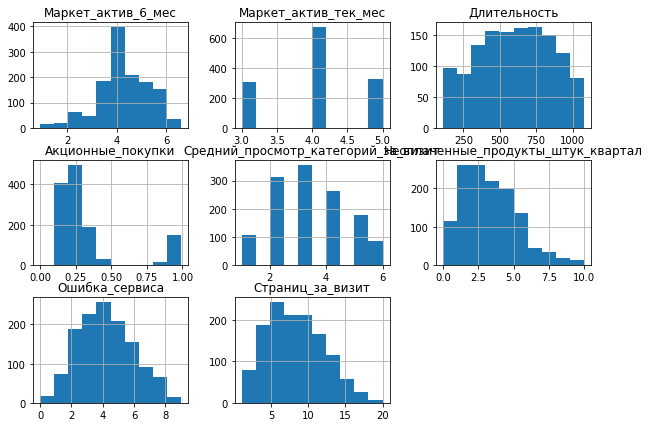

In [14]:
stat(data_file)

,count,mean,std,min,25%,50%,75%,max
id,3900.0,215997.500000,375.325686,215348.0,215672.75,215997.5,216322.25,216647.0
Выручка,3900.0,5025.696051,1777.704104,0.0,4590.15,4957.5,5363.00,106862.2


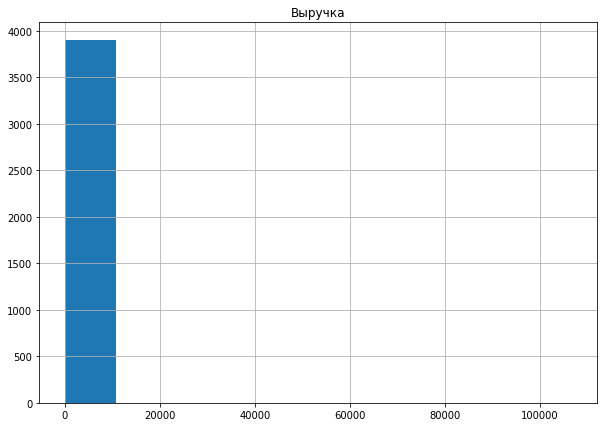

In [15]:
stat(data_market_money)

,count,mean,std,min,25%,50%,75%,max
id,2600.0,215997.500000,375.349754,215348.0,215672.75,215997.5,216322.25,216647.0
Минут,2600.0,13.336154,4.080198,4.0,10.00,13.0,16.00,23.0


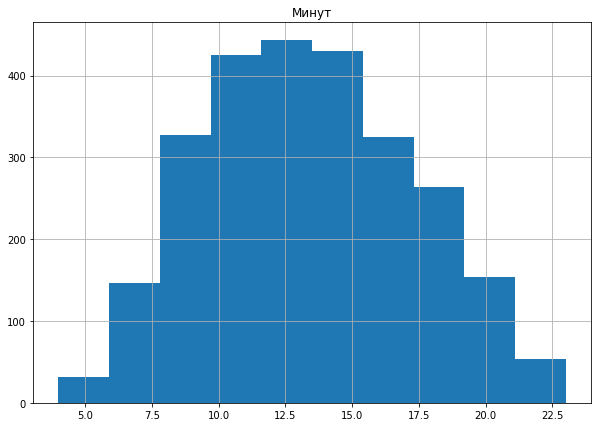

In [16]:
stat(data_time)

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.00,215672.75,215997.500,216322.25,216647.00
Прибыль,1300.0,3.996631,1.013722,0.86,3.30,4.045,4.67,7.43


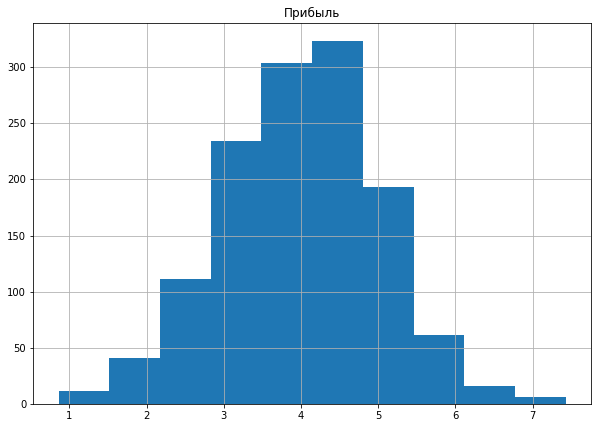

In [17]:
stat(data_money)

Рассмотрим лучше столбец "Выручка" из 2 таблицы, так как очевидно что с ним что то не так и там есть выбросы

Text(0, 0.5, 'Сумма выручки за период')

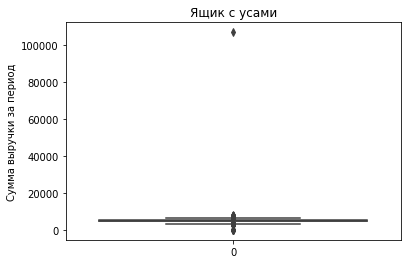

In [18]:
sns.boxplot(data = data_market_money['Выручка'])
plt.title('Ящик с усами')
plt.ylabel('Сумма выручки за период')

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Действительно явный выброс.
Можно удалить, а можно и заполнить, например значением предыдущего месяца.</font>

Удалим выброс)))

Text(0, 0.5, 'Сумма выручки за период')

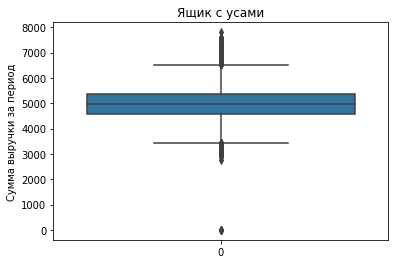

In [19]:
data_market_money = data_market_money[data_market_money['Выручка'] != 106862.2]
sns.boxplot(data = data_market_money['Выручка'])
plt.title('Ящик с усами')
plt.ylabel('Сумма выручки за период')

"0" тоже можно отнести как выброс, удалим и его тоже)

Text(0, 0.5, 'Сумма выручки за период')

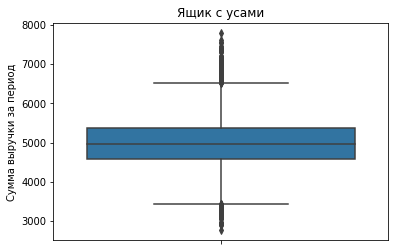

In [20]:
data_market_money = data_market_money[data_market_money['Выручка'] != 0]
sns.boxplot(data = data_market_money, y = 'Выручка')
plt.title('Ящик с усами')
plt.ylabel('Сумма выручки за период')

Избавились от выбросов теперь можно заново взглянуть на распределение признака

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Неактивные удалены 👌</font>

count    3893.000000
mean     5007.282918
std       679.724898
min      2758.700000
25%      4592.000000
50%      4959.000000
75%      5363.000000
max      7799.400000
Name: Выручка, dtype: float64


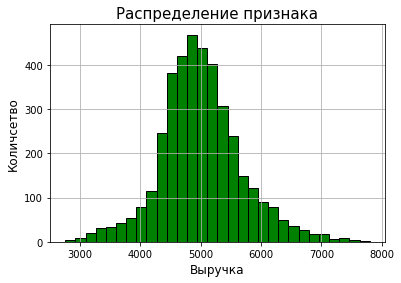

In [21]:
data_market_money['Выручка'].hist(color='green', bins=30, edgecolor = 'black')
plt.title('Распределение признака', fontsize=15)
plt.xlabel('Выручка', fontsize=12)
plt.ylabel('Количсетво',fontsize=12)
print(data_market_money['Выручка'].describe())

Ну такая няшность, совсем другое дело - нормальное распределение)

Построим такие графики распределений и ящики с усами для всех признаков)

### Построим графики для каждого признака

Напишем функции для количественных признаков

In [22]:
def bxplt(DATA, name):
    sns.boxplot(data = DATA, y = name)
    plt.ylabel(name)
    plt.title('Ящик с усами')
    
def hst(DATA, name):
    DATA[name].hist(color='green', bins=60, edgecolor = 'black')
    plt.title('Распределение признака', fontsize=15)
    plt.xlabel(name, fontsize=12)
    plt.ylabel('Количеcтво',fontsize=12)
    print(DATA[name].describe())

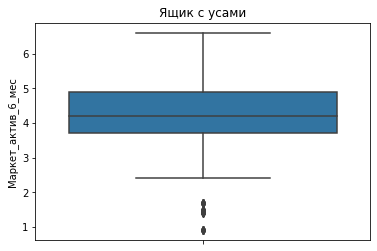

In [23]:
bxplt(data_file, 'Маркет_актив_6_мес')

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: Маркет_актив_6_мес, dtype: float64


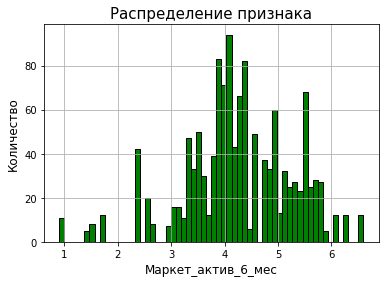

In [24]:
hst(data_file, 'Маркет_актив_6_мес')

распределение нормальное, но данных маловато чтобы точно утверждать)

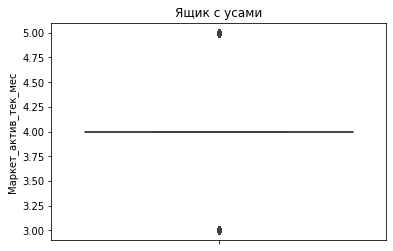

In [25]:
bxplt(data_file, 'Маркет_актив_тек_мес')

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Маркет_актив_тек_мес, dtype: float64


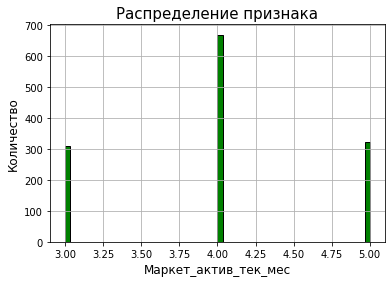

In [26]:
hst(data_file, 'Маркет_актив_тек_мес')

Внешний вид графиков обусловлен тем, что значения в данном столбце могут принимать всего 3 значения)))

In [27]:
data_file['Маркет_актив_тек_мес'].unique()

array([5, 4, 3])

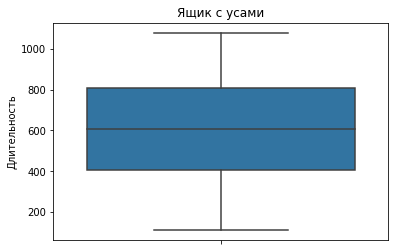

In [28]:
bxplt(data_file, 'Длительность')

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: Длительность, dtype: float64


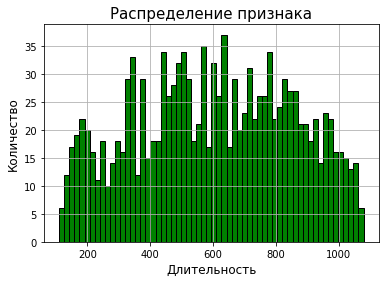

In [29]:
hst(data_file, 'Длительность')

Распределение нормальное

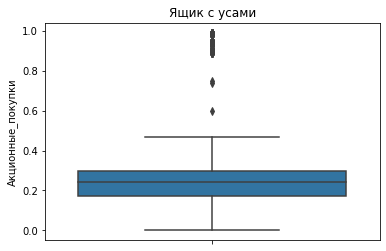

In [30]:
bxplt(data_file, 'Акционные_покупки')

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: Акционные_покупки, dtype: float64


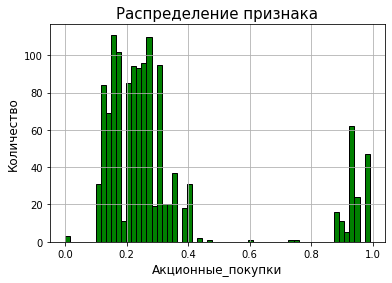

In [31]:
hst(data_file, 'Акционные_покупки')

Распределение бимодальное

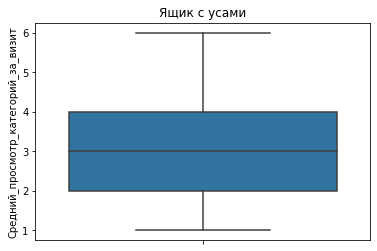

In [32]:
bxplt(data_file, 'Средний_просмотр_категорий_за_визит')

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: Средний_просмотр_категорий_за_визит, dtype: float64


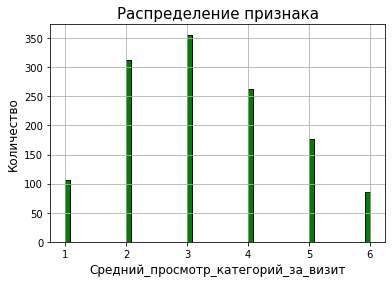

In [33]:
hst(data_file, 'Средний_просмотр_категорий_за_визит')

нормальное распрелеление

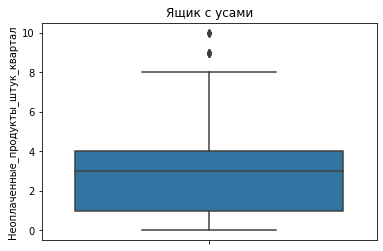

In [34]:
bxplt(data_file,  'Неоплаченные_продукты_штук_квартал')

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: Неоплаченные_продукты_штук_квартал, dtype: float64


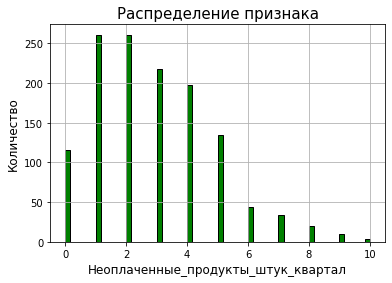

In [35]:
hst(data_file,  'Неоплаченные_продукты_штук_квартал')

Похоже что это пуассон, характерная форма графика)))

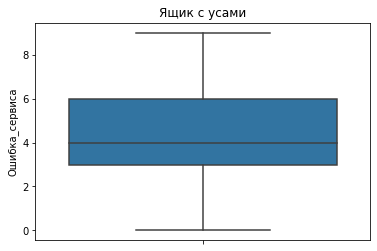

In [36]:
bxplt(data_file, 'Ошибка_сервиса')

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: Ошибка_сервиса, dtype: float64


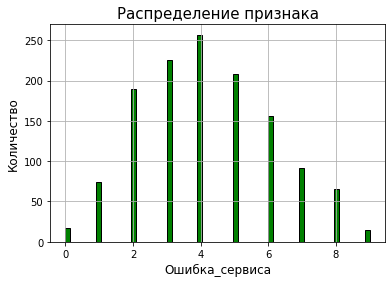

In [37]:
hst(data_file, 'Ошибка_сервиса')

Распределение нормальное

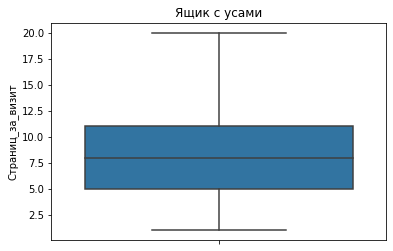

In [38]:
bxplt(data_file, 'Страниц_за_визит')

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: Страниц_за_визит, dtype: float64


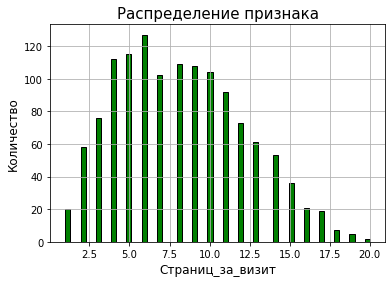

In [39]:
hst(data_file, 'Страниц_за_визит')

Пуассон

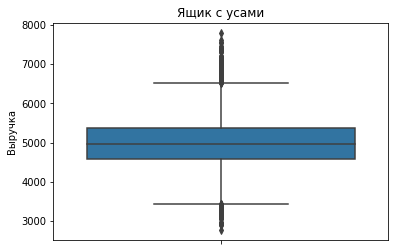

In [40]:
bxplt(data_market_money, 'Выручка')

count    3893.000000
mean     5007.282918
std       679.724898
min      2758.700000
25%      4592.000000
50%      4959.000000
75%      5363.000000
max      7799.400000
Name: Выручка, dtype: float64


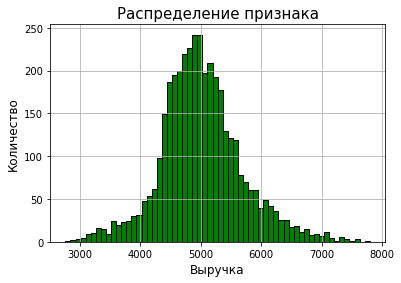

In [41]:
hst(data_market_money, 'Выручка')

Ярко выраженное нормальное распределение

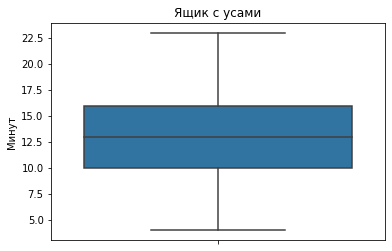

In [42]:
bxplt(data_time, 'Минут')

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: Минут, dtype: float64


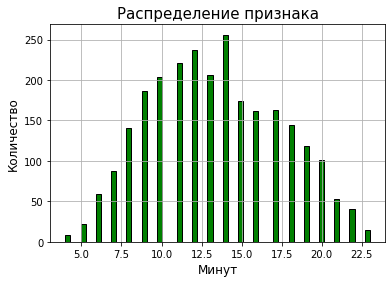

In [43]:
hst(data_time, 'Минут')

Нормальное распредление

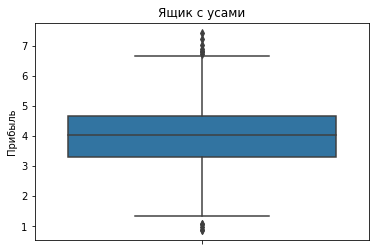

In [44]:
bxplt(data_money, 'Прибыль')

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: Прибыль, dtype: float64


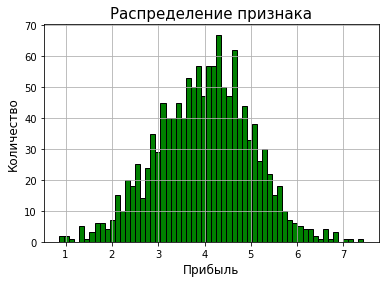

In [45]:
hst(data_money, 'Прибыль')

Признак распределен нормально)))

Важно отметить что в некоторых признаках были замечены выбросы, поэтому определим процент выбросов в каждом из этих признаков.

In [46]:
print(f'Процент выбросов в признаке "Маркет_актив_6_мес": {(len(data_file[data_file["Маркет_актив_6_мес"] < 2]) / len(data_file) * 100)}%')
print(f'Процент выбросов в признаке "Акционные_покупки": {(len(data_file[data_file["Акционные_покупки"] > 0.5]) / len(data_file) * 100)}%')
print(f'Процент выбросов в признаке "Неоплаченные_продукты_штук_квартал": {(len(data_file[data_file["Неоплаченные_продукты_штук_квартал"] > 8]) / len(data_file) * 100)}%')
print(f'Процент выбросов в признаке "Выручка": {(len(data_market_money.query("Выручка > 6000 | Выручка < 4000")) / len(data_market_money) * 100)}%')
print(f'Процент выбросов в признаке "Прибыль": {(len(data_money.query("Прибыль > 6 | Прибыль < 2")) / len(data_money) * 100)}%')

Процент выбросов в признаке "Маркет_актив_6_мес": 2.769230769230769%
Процент выбросов в признаке "Акционные_покупки": 12.923076923076923%
Процент выбросов в признаке "Неоплаченные_продукты_штук_квартал": 1.0769230769230769%
Процент выбросов в признаке "Выручка": 13.357307988697661%
Процент выбросов в признаке "Прибыль": 4.461538461538462%


В признаках процент выбросов либо слишком мал, либо слишком велик для того чтобы их удалять, к тому же, выбросы имеют вполне реальные значения, это вполне реалистичные данные => ничего не трогаем)))

Итак, большинство признаков распределены нормально, и только два признака имеют распределение Пуассона)

Теперь разберемся с категориальными приззнаками, построим для каждого из них диаграмму >>> для этого напишем функцию

In [47]:
def pie(DATA, name):
    print(DATA[name].value_counts())
    fig, ax = plt.subplots()
    ax.pie(DATA[name].value_counts(), labels=DATA[name].unique(), autopct='%.2f%%')
    plt.title(f'Распределение признака {name}')

Прежний уровень    802
Снизилась          498
Name: Покупательская_активность, dtype: int64


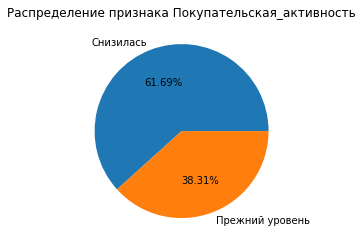

In [48]:
pie(data_file, 'Покупательская_активность')

стандарт    924
премиум     376
Name: Тип_сервиса, dtype: int64


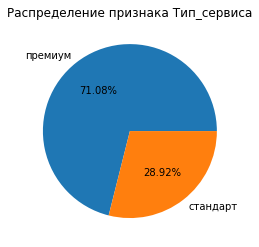

In [49]:
pie(data_file, 'Тип_сервиса')

да     962
нет    338
Name: Разрешить_сообщать, dtype: int64


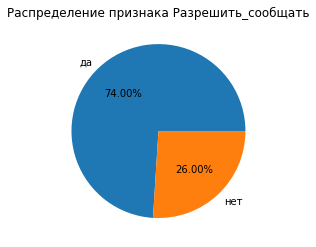

In [50]:
pie(data_file, 'Разрешить_сообщать')

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: Популярная_категория, dtype: int64


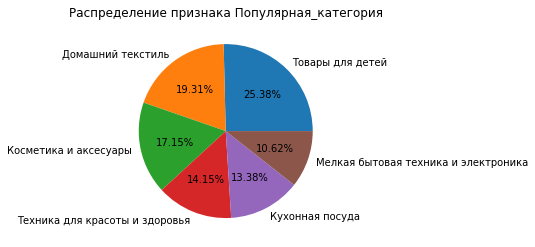

In [51]:
pie(data_file, 'Популярная_категория')

текущий_месяц          1299
предыдущий_месяц       1297
препредыдущий_месяц    1297
Name: Период, dtype: int64


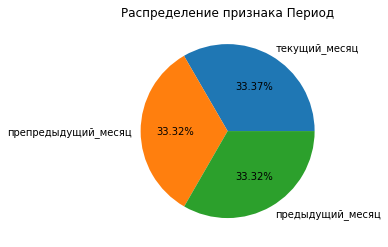

In [52]:
pie(data_market_money, 'Период')

текущий_месяц       1300
предыдущий_месяц    1300
Name: Период, dtype: int64


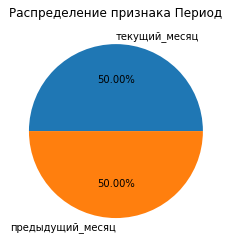

In [53]:
pie(data_time, 'Период')

Посчитаем общую выручку за текущий и предыдущий месяцы >>>

Период
предыдущий_месяц       6417996.5
препредыдущий_месяц    6272769.0
текущий_месяц          6802586.9
Name: Выручка, dtype: float64


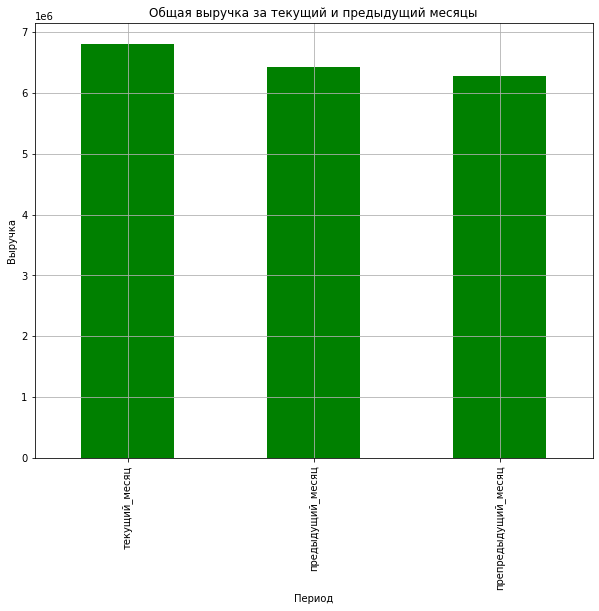

In [54]:
group_market = data_market_money.groupby('Период')['Выручка'].sum()
group_market.sort_values(ascending = False).plot(kind='bar', figsize=(10, 8), color='green', xlabel='Период', ylabel='Выручка', grid='on')
plt.title('Общая выручка за текущий и предыдущий месяцы')
print(group_market)

Период
предыдущий_месяц    17508
текущий_месяц       17166
Name: Минут, dtype: int64


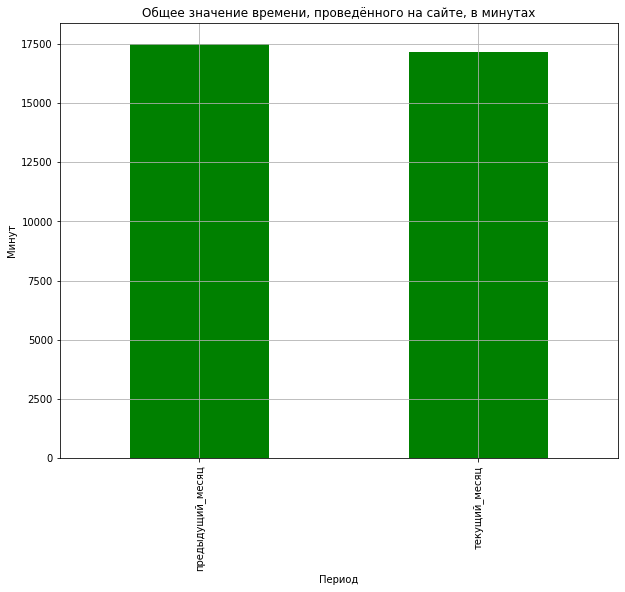

In [55]:
group_time = data_time.groupby('Период')['Минут'].sum()
group_time.sort_values(ascending = False).plot(kind='bar', figsize=(10, 8), color='green', xlabel='Период', ylabel='Минут', grid='on')
plt.title('Общее значение времени, проведённого на сайте, в минутах')
print(group_time)

### Сделаем выводы о данных

Вывод к шагу 3

Исследовательский анализ дал следующее:
- в основном все признаки распределены нормально, в некоторых наблюдается неравномерность
- удалена аномалия в 100k в столбце "Выручка"
- в среднем cумма выручки за период составляет ~ 5000
- самая популярная категория оказалась "Товары для детей"
- средняя доля акционных покупок составляет 0.24, но некоторые покупатели распределены около значения 1, что значит, что их корзина преимущественно состоит из акционных товаров
- общее число неоплаченных товаров в корзине за последние 3 месяца составило примерн 3 шт
- выручка за текущий месяц выросла по сравнению с другими месяцами)
- очевидно что активность пользователей снизилась(это говориться в условии и демонстрируется на диаграмме)
- общее значение времени, проведённого на сайте, в минутах почти не изменилось

In [56]:
print("Число клиентов которые не делали покупки за последние 3 месяца:", 
      data_market_money[data_market_money['Выручка'] == 0]['id'].count())

Число клиентов которые не делали покупки за последние 3 месяца: 0


Клиентов с 0 выручкой нет, следовательно клиенты с покупательской активностью не менее трёх месяцев уже отобраны)

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Хорошая работа в части исследования данных: молодец, что используешь функции, а также применяешь подходящие для типов данных инструменты.</font>

## Объединение таблиц

На данном этапе просто объединим таблицы, сделаем столбец для каждого периода и еще раз проверим условие о 3 месяцев

In [57]:
try:
    data_time = pd.pivot_table(data_time, index='id', columns='Период', values='Минут')
except:
    pass
data_time['all'] = data_time.loc[:,data_time.columns].sum(axis=1)
data_time.columns = ['Минут_пред', 'Минут_тек', 'all']

try:
    data_market_money = pd.pivot_table(data_market_money, index='id', columns='Период', values='Выручка')
except:
    pass
data_market_money['all'] = data_market_money.loc[:, data_market_money.columns].sum(axis=1)
data_market_money.columns = ['Выручка_пред', 'Выручка_препред', 'Выручка_тек', 'all']

all_data = data_file.merge(data_market_money.drop('all',axis=1), on='id', how='inner').merge(data_time.drop('all',axis=1), on='id', how='inner')
# all_data['Выручка_пред'] = all_data['Выручка_пред'].fillna(0)
# all_data['Выручка_препред'] = all_data['Выручка_препред'].fillna(0)
# all_data['Выручка_тек'] = all_data['Выручка_тек'].fillna(0)
display(all_data)
print(all_data.info())
# исправленный код после 1 ревью
all_data = all_data.dropna(subset=['Выручка_пред'])
all_data = all_data.dropna(subset=['Выручка_препред'])
all_data = all_data.dropna(subset=['Выручка_тек'])

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_пред,Выручка_препред,Выручка_тек,Минут_пред,Минут_тек
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,NaN,NaN,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская_активность            1300 non-null   object 
 2   Тип_сервиса                          1300 non-null   object 
 3   Разрешить_сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [58]:
display(all_data.head(10))

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_пред,Выручка_препред,Выручка_тек,Минут_пред,Минут_тек
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
6,215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,5685.0,4503.0,5869.6,11,12
7,215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,3263.0,4749.0,3772.6,12,10
8,215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4146.5,4433.0,4566.4,6,7
10,215358,Снизилась,стандарт,да,4.7,4,450,0.13,Домашний текстиль,4,2,6,4,3488.0,4727.0,4209.5,14,10
12,215360,Снизилась,премиум,да,3.9,3,623,0.35,Кухонная посуда,3,1,4,7,5304.5,5555.0,5834.9,9,6


In [59]:
all_data.shape

(1296, 18)

In [60]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   Покупательская_активность            1296 non-null   object 
 2   Тип_сервиса                          1296 non-null   object 
 3   Разрешить_сообщать                   1296 non-null   object 
 4   Маркет_актив_6_мес                   1296 non-null   float64
 5   Маркет_актив_тек_мес                 1296 non-null   int64  
 6   Длительность                         1296 non-null   int64  
 7   Акционные_покупки                    1296 non-null   float64
 8   Популярная_категория                 1296 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  Ошибка_сервиса                

In [61]:
all_data = all_data.loc[all_data['Выручка_пред'] != 0]
all_data = all_data.loc[all_data['Выручка_препред'] != 0]
all_data = all_data.loc[all_data['Выручка_тек'] != 0]
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   Покупательская_активность            1296 non-null   object 
 2   Тип_сервиса                          1296 non-null   object 
 3   Разрешить_сообщать                   1296 non-null   object 
 4   Маркет_актив_6_мес                   1296 non-null   float64
 5   Маркет_актив_тек_мес                 1296 non-null   int64  
 6   Длительность                         1296 non-null   int64  
 7   Акционные_покупки                    1296 non-null   float64
 8   Популярная_категория                 1296 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  Ошибка_сервиса                

Еще раз убедились, что все клиенты у нас активные, то есть соврешали покупки за все эти 3 месяца)

In [62]:
print("Число клиентов которые не делали покупки хотя бы в одном из трёх месяцев: ", all_data.query('Выручка_пред == 0 | Выручка_препред == 0 | Выручка_тек == 0')['id'].count())

Число клиентов которые не делали покупки хотя бы в одном из трёх месяцев:  0


Вывод к шагу 4
- объединили таблицы
- проверили данные
- сделаны отдельные столбцы для каждого периода

## Корреляционный анализ

Здесь я проведу корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования и сделаю выводы о мультиколлинеарности и при необходимости устраню её.

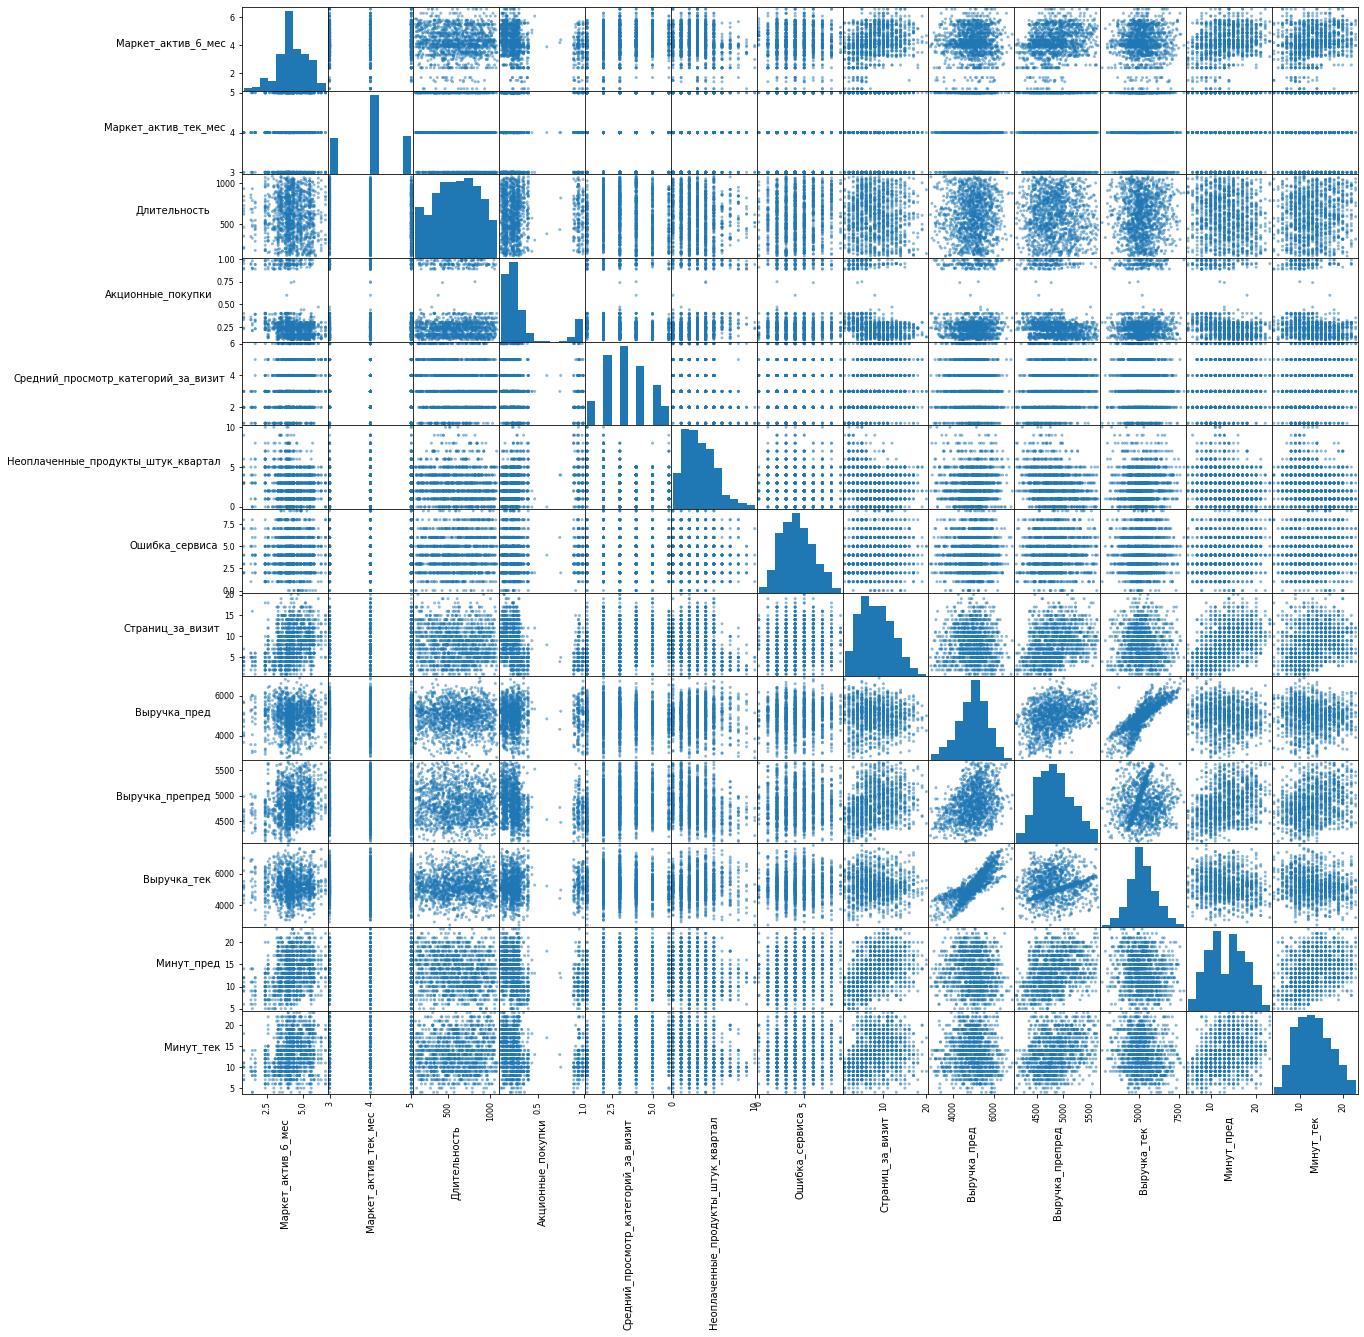

In [63]:
scatter_matrix = pd.plotting.scatter_matrix(all_data.drop('id', axis=1), figsize=(20, 20))
for ax in scatter_matrix.ravel():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()

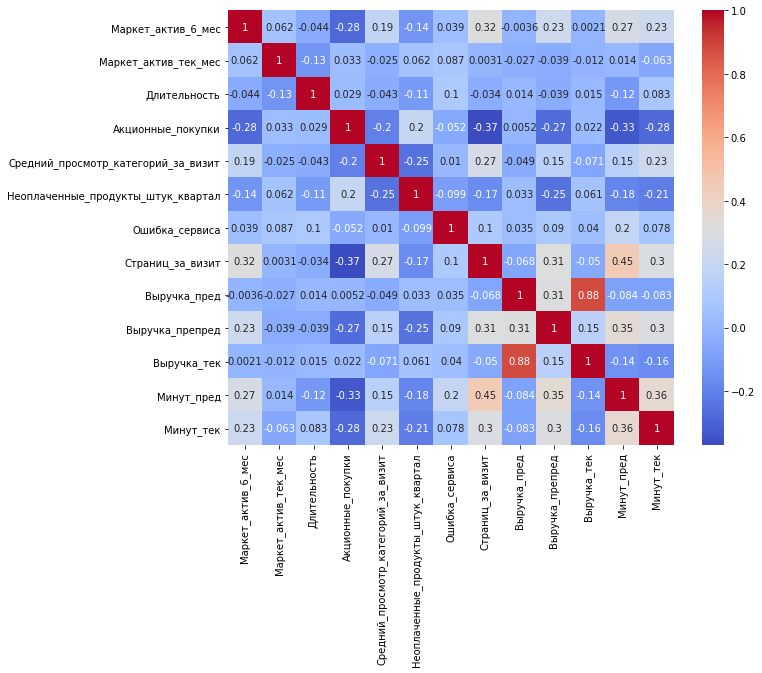

In [64]:
numeric_cols = all_data.select_dtypes(include=['number']).drop('id', axis=1).columns
correlation_matrix = all_data[numeric_cols].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',  fmt='.2g')
plt.show()

Ну вообще в прошлом проекте я считала что, о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю, в нашем случае опять же таковых не имеется => мультиколлениарности НЕТ

Вывод к шагу 5, итак, мультиколлениарность не обнаружена)

## Использование пайплайнов

### Во время подготовки данных используем ColumnTransformer

Вводим константы и разбиваем выборку, используем LabelEncoder() для того чтобы закодировать строковые классы числами — так вычисления выполнятся быстрее >>>

In [65]:
RANDOM_STATE = 42
TEST_SIZE = 0.25
all_data['Покупательская_активность'] = all_data['Покупательская_активность'].apply(lambda x: 0 if x == 'Прежний уровень' else 1)
display(all_data)

X = all_data.drop(['id', 'Покупательская_активность'], axis=1)
y = all_data['Покупательская_активность']

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_пред,Выручка_препред,Выручка_тек,Минут_пред,Минут_тек
1,215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,1,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,1,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,0,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1296,216644,0,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1297,216645,0,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1298,216646,0,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

Создаем списки с названиями признаков 

In [67]:
ohe_columns = ['Разрешить_сообщать', 'Популярная_категория']
ord_columns = ['Тип_сервиса']
num_columns = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки',
               'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал',
               'Ошибка_сервиса', 'Страниц_за_визит', 'Выручка_препред', 'Выручка_пред', 'Выручка_тек', 'Минут_пред', 'Минут_тек']

Добавляем OHE-кодирование, Ordinal-кодирование и масштабирование в пайплайн

In [69]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe',
            OneHotEncoder(drop='first', sparse_output=False)  # Changed to sparse_output
        )
    ]
)


In [70]:
ord_pipe = Pipeline(
    [
        (
            'ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
        ),
        (
            'simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

Создаем общий пайплайн для подготовки данных

In [71]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

Создаем итоговый пайплайн: подготовка данных и модель

In [72]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

###  Обучим четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC()

In [73]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(5, 100),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__kernel': ['linear', 'rbf'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
    
]
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse_output=False))]),
                                                                               ['Разрешить_сообщать',
                                                                                'Популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('ord',
                                                                                                OrdinalE...
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [KNeighborsClassifier()],
                                         'models__n_neighbors': range(5, 100),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__kernel': ['linear', 'rbf'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

### Выберем лучшую модель, используя заданную метрику

In [74]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)
y_test_pred = randomized_search.predict(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Разрешить_сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                 

In [75]:
probabilities = randomized_search.predict_proba(X_test)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(y_test, probabilities_one))

Площадь ROC-кривой: 0.9106742023408689


Вывод к шагу 6
- произведено преобразование признаков 
- обучено 4 разные модели, а именно KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(), SVC() с разными гиперпараметрами, также выбрана подходящая метрика.
- выбрана лучшая модель, а именно KNeighborsClassifier(n_neighbors=20), метрика модели на тренировочной выборке составила 0.91, 
а метрика ROC-AUC на тестовой выборке: 0.86, Площадь ROC-кривой: 0.9106742023408689

## Анализ важности признаков

### Оценим важность признаков для лучшей модели и постройте график важности с помощью метода SHAP

In [84]:
# COUNT = 10
# best_model = randomized_search.best_estimator_.named_steps['models']
# preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']

# X_train_prep = preprocessor.transform(X_train)
# X_test_prep = preprocessor.transform(X_test)

# ohe_feature_names = preprocessor.named_transformers_['ohe'].named_steps['ohe'].get_feature_names_out(input_features=ohe_columns)
# ord_feature_names = ord_columns
# num_feature_names = num_columns
# all_feature_names = np.concatenate([ohe_feature_names, ord_feature_names, num_feature_names])

# X_train_prep_data = pd.DataFrame(X_train_prep, columns=all_feature_names)
# X_test_prep_data = pd.DataFrame(X_test_prep, columns=all_feature_names)
# X_train_prep_sample = shap.sample(X_train_prep_data, COUNT, random_state=RANDOM_STATE)
# X_test_prep_sample = shap.sample(X_test_prep_data, COUNT, random_state=RANDOM_STATE)

# explainer = shap.KernelExplainer(best_model.predict_proba, X_train_prep_sample)
# shap_values = explainer.shap_values(X_test_prep_sample)

# shap.summary_plot(shap_values[:,:,1], X_test_prep_sample, plot_type="bar")

### Сделам выводы о значимости признаков

Вывод к шагу 7:
- построен график важности признаков для лучшей модели с помощью графика SHAP
- признаки мало значимые для модели: 'Маркет_актив_6_мес', 'Тип_сервиса', 'Разрешить сообщать'
- признаки сильнее всего влияющие на целевой признак: 'Акционные_покупки', 'Минут_тек', 'Минут_пред', 'Страниц_за_визит'
- использование этих наблюдений при моделировании и принятии бизнес-решений: руководство магазина должно обращать внимание на проведение акций в магазине, возможно разнообразить количество и качество товаров попадающий под акции и на самом сайте акцентировать на них большее внимание, так как это один из ключевых признаков. Нужно устроить и сделать сайт таким образом чтобы время проведенное клиентом на нем было как можно больше и клиенту захотелось рассмотреть большее количество страниц, так как это тоже как оказалось влияет на покупательную активность.

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

## Сегментация покупателей

P.s если я иду не в том направлении, можете мне пожалуйста подсказать что тут делать, а то я вообще не понимаю(надеюсь так можно спрашивать и я не нарушила никаких правил) :(
Это сообщение любимому и лучшему ревьюеру)))

Порог перебирался вручную))) чтобы выборка состояла не совсем маленького, но и не большого количества покупателей)

In [77]:
threshold = 0.9

Здесь я выполняю сегментацию покупателей, используя результаты моделирования и данные о прибыльности покупателей.

Выбираем покупателей у кого активность предсказана снижаться и берем данные о их прибыле из таблицы money и обьеденим с помощью merge)

</span><br><span style="color: purple; font-weight: bold"> Код тут (после 2 ревью), тут я добавляю в основную таблицу all_data значение прибыли и вероятность снижения</span>

In [78]:
probabilities = randomized_search.predict_proba(X)
probabilities_one = probabilities[:, 1]
all_data['Вероятность_снижения'] = probabilities_one
display(all_data)

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_пред,Выручка_препред,Выручка_тек,Минут_пред,Минут_тек,Вероятность_снижения
1,215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,1.00
2,215350,1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,0.35
3,215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,0.95
4,215352,1,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,0.95
5,215353,1,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,0,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7,0.10
1296,216644,0,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11,0.05
1297,216645,0,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18,0.05
1298,216646,0,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7,0.15


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [79]:
all_data = pd.merge(all_data, data_money, on='id', suffixes='_left')
display(all_data)

/tmp/ipykernel_208/565215349.py:1: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  all_data = pd.merge(all_data, data_money, on='id', suffixes='_left')


,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_пред,Выручка_препред,Выручка_тек,Минут_пред,Минут_тек,Вероятность_снижения,Прибыль
0,215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,1.00,4.16
1,215350,1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,0.35,3.13
2,215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,0.95,4.87
3,215352,1,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,0.95,4.21
4,215353,1,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,0.60,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,0,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7,0.10,4.44
1292,216644,0,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11,0.05,6.11
1293,216645,0,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18,0.05,3.29
1294,216646,0,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7,0.15,4.03


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

Итак у нас отобраны 327 покупателей чья покупательская активность предсказана снизиться

In [80]:
seg = all_data[all_data['Вероятность_снижения'] >= 0.8]
seg = seg[seg['Прибыль'] > 4]
display(seg)
display(all_data)

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_пред,Выручка_препред,Выручка_тек,Минут_пред,Минут_тек,Вероятность_снижения,Прибыль
0,215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,1.00,4.16
2,215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,0.95,4.87
3,215352,1,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,0.95,4.21
7,215356,1,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4146.5,4433.0,4566.4,6,7,1.00,4.93
17,215368,1,премиум,да,3.8,5,829,0.24,Техника для красоты и здоровья,2,2,6,1,5823.0,4536.0,5591.6,11,9,0.95,6.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,215908,1,премиум,нет,4.0,4,845,0.12,Домашний текстиль,2,7,6,5,4396.0,4933.0,4991.4,10,12,0.90,5.26
558,215910,1,стандарт,нет,3.9,3,509,0.95,Косметика и аксесуары,2,6,4,5,5360.0,4874.0,5911.2,11,17,0.90,4.61
763,216115,0,стандарт,нет,4.4,4,808,0.17,Мелкая бытовая техника и электроника,4,2,0,3,4802.5,4543.0,5157.4,11,9,0.90,4.06
1081,216433,0,стандарт,нет,4.0,3,788,0.23,Товары для детей,2,3,4,7,4752.0,4884.0,4996.4,9,5,0.90,5.03


,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_пред,Выручка_препред,Выручка_тек,Минут_пред,Минут_тек,Вероятность_снижения,Прибыль
0,215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,1.00,4.16
1,215350,1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,0.35,3.13
2,215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,0.95,4.87
3,215352,1,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,0.95,4.21
4,215353,1,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,0.60,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,0,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7,0.10,4.44
1292,216644,0,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11,0.05,6.11
1293,216645,0,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18,0.05,3.29
1294,216646,0,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7,0.15,4.03


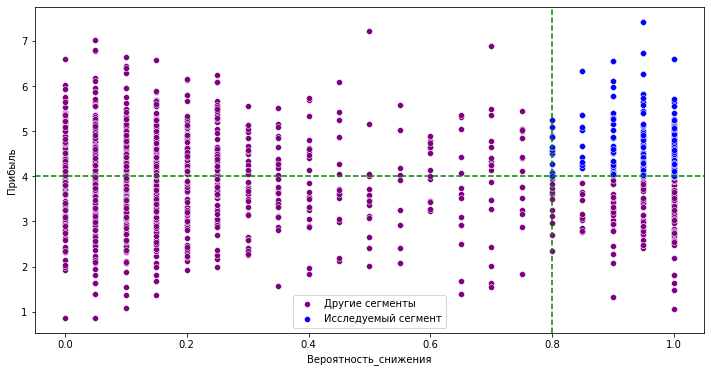

In [81]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=all_data, x='Вероятность_снижения', y='Прибыль', label='Другие сегменты', color='purple')
sns.scatterplot(data=seg, x='Вероятность_снижения', y='Прибыль', label='Исследуемый сегмент', color='blue')
plt.legend()
plt.axvline(x=0.8, color='green', linestyle='--')
plt.axhline(y=4, color='green', linestyle='--')
plt.show()

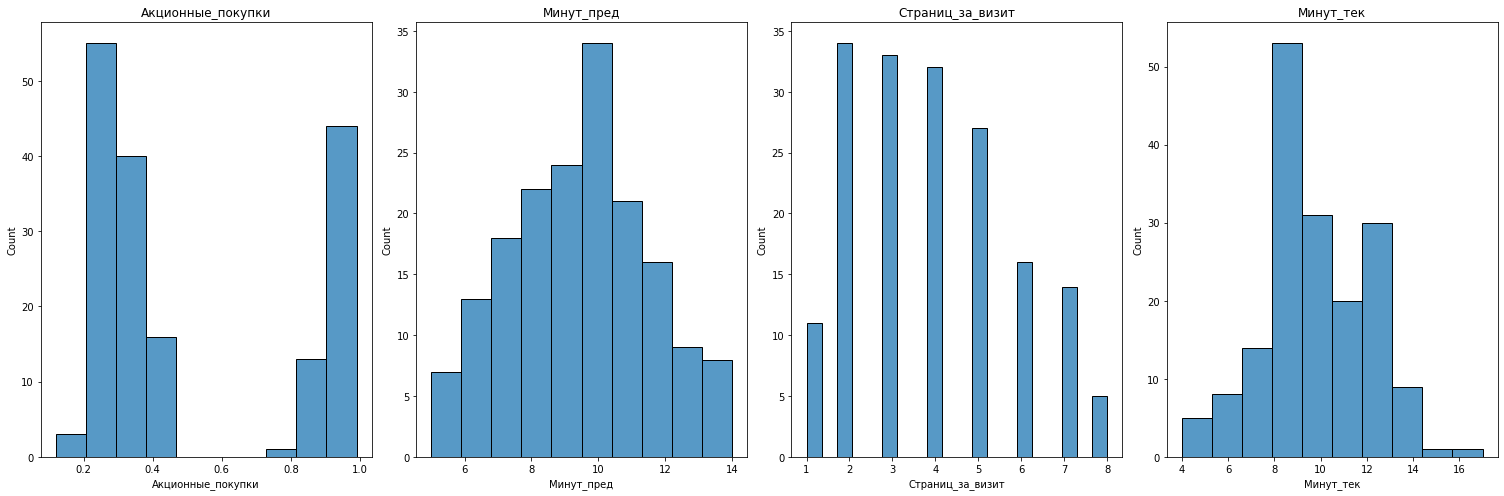

In [82]:
plt.figure(figsize=(21, 7))

plt.subplot(1, 4, 1)
sns.histplot(seg['Акционные_покупки'], bins=10)
plt.title('Акционные_покупки')

plt.subplot(1, 4, 2)
sns.histplot(seg['Минут_пред'], bins=10)
plt.title('Минут_пред')

plt.subplot(1, 4, 3)
sns.histplot(seg['Страниц_за_визит'], bins=20)
plt.title('Страниц_за_визит')

plt.subplot(1, 4, 4)
sns.histplot(seg['Минут_тек'], bins=10)
plt.title('Минут_тек')

plt.tight_layout()
plt.show()

Вывод к шагу 8:

- для дополнительного исследования был выбран сегмент клиентов с признаками у которых вероятность снижения не менее 0.8 и с прибылью (из исследовательского анализа средняя прибыль примерно = 4) выше среднего, то есть начиная с 4. Такой выбор обусловлен тем, что хотелось бы выявить какую нибудь закономерность, или предположить что сподвигло людей, раньше часто совершавших покупки в онлайн магазине, теперь почти их не делать)
- сделаны следующие выводы по графикам:
1) - для таких клиентов характерно маленькое количество страниц(от 2 до 4 вместо 8) просмотренных за визит, и время проведенное на странице сайта меньше обычного(10, вместо 13)
2) - по графику видно что у немалой части таких клиентов корзина состоит преимущественно из акционных товаров, ну и у почти всех клиентов всегда был какой нибудь акционный товар в корзине при покупке


Ну совет остался такой же, поработать над сайтом, чтобы люди проводили на нем больше времени и просматривали большее количсетво ассортимента, следить за акционным товаром, за его качесвтом и количеством, чтобы удержать большее количество клиентов интересующихся акционными продуктами)

<span style="color: blue; font-weight: bold">Комментарий ревьюера 3: </span> ✔️\
<span style="color: green"> 👍</span>

## Общий вывод

Подведем итоги, 

Основные цели и задачи заключались в следующем:


- Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.
- Разработать модель, которая предскажет вероятность снижения покупательской активности.
- Выделить сегмент покупателей, проанализируйте его и предложите, как увеличить его покупательскую активность.


--------------------------------------Первым шагом была загрузка данных - -------------------------------------------
- Выгрузили и ознакомились с данными, для каждого датафрейма обнаружено следующее >>>

- Данные в таблицах соответствуют описанию
- В таблицах нет пропусков и явных дубликатов
- Типы данных верные

- Следовательно с такими данными можно работать. Но стоит заметить, что нужно изменить название столбцов и опечатки в данных("стандартт", "предыдцщий_месяц")

-----------------------------------------второй шаг - предобработка данных - На данном этапе: ---------------------------
- исправлены названия столбцов
- удалены неявные дубликаты 
- исправлены опечатки

- убедились что данные точно в порядке и с ними можно работать)))

-----------------------------------третий шаг - исследовательский анализ - сделаны следующие выводы:----------------------

1 - в основном все признаки распределены нормально, в некоторых наблюдается неравномерность
2 - удалена аномалия в 100k в столбце "Выручка"
3 - в среднем cумма выручки за период составляет ~ 5000
4 - самая популярная категория оказалась "Товары для детей"
5 - средняя доля акционных покупок составляет 0.24, но некоторые покупатели распределены около значения 1, что значит, что их корзина преимущественно состоит из акционных товаров
6 - общее число неоплаченных товаров в корзине за последние 3 месяца составило примерн 3 шт
7 - выручка за текущий месяц выросла по сравнению с другими месяцами)
8 - очевидно что активность пользователей снизилась(это говориться в условии и демонстрируется на диаграмме)
9 - общее значение времени, проведённого на сайте, в минутах почти не изменилось

---------------------------------------------четвертый шаг - объединение таблиц:-------------------------------------------

- объединили таблицы
- проверили данные
- сделаны отдельные столбцы для каждого периода

------------------------------------------------ пятый шаг - из корреляционного анализа следует:---------------------------

- мультиколлениарность не обнаружена)

---------------------------------------------------шестой шаг - Использование пайплайнов----------------------------------
- произведено преобразование признаков 
- обучено 4 разные модели, а именно KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(), SVC() с разными гиперпараметрами, также выбрана подходящая метрика.
- выбрана лучшая модель, а именно KNeighborsClassifier(n_neighbors=20), метрика модели на тренировочной выборке составила 0.91, а метрика ROC-AUC на тестовой выборке: 0.86, Площадь ROC-кривой: 0.9106742023408689

--------------------------------------------седьмой шаг - Анализ важности признаков:---------------------------------------

- построен график важности признаков для лучшей модели с помощью графика SHAP
- признаки мало значимые для модели: 'Маркет_актив_6_мес', 'Тип_сервиса', 'Разрешить сообщать'
- признаки сильнее всего влияющие на целевой признак: 'Акционные_покупки', 'Минут_тек', 'Минут_пред', 'Страниц_за_визит'
- использование этих наблюдений при моделировании и принятии бизнес-решений: руководство магазина должно обращать внимание на проведение акций в магазине, возможно разнообразить количество и качество товаров попадающий под акции и на самом сайте акцентировать на них большее внимание, так как это один из ключевых признаков. Нужно устроить и сделать сайт таким образом чтобы время проведенное клиентом на нем было как можно больше и клиенту захотелось рассмотреть большее количество страниц, так как это тоже как оказалось влияет на покупательную активность.

--------------------------------------------------- восьмой шаг - Сегментация покупателей:--------------------------------

- для дополнительного исследования был выбран сегмент клиентов с признаками у которых вероятность снижения не менее 0.8 и с прибылью (из исследовательского анализа средняя прибыль примерно = 4) выше среднего, то есть начиная с 4. Такой выбор обусловлен тем, что хотелось бы выявить какую нибудь закономерность, или предположить что сподвигло людей, раньше часто совершавших покупки в онлайн магазине, теперь почти их не делать)
- сделаны следующие выводы по графикам:

1) - для таких клиентов характерно маленькое количество страниц(от 2 до 4 вместо 8) просмотренных за визит, и время проведенное на странице сайта меньше обычного(10, вместо 13)

2) - по графику видно что у немалой части таких клиентов корзина состоит преимущественно из акционных товаров, ну и у почти всех клиентов всегда был какой нибудь акционный товар в корзине при покупке


Ну совет остался такой же, поработать над сайтом, чтобы люди проводили на нем больше времени и просматривали большее количсетво ассортимента, следить за акционным товаром, за его качесвтом и количеством, чтобы удержать большее количество клиентов интересующихся акционными продуктами)
